In [1]:
import numpy as np
import matplotlib.pyplot as plt

from zodipol.mie_scattering.particle_size_model import ParticleSizeModel
from zodipol.mie_scattering import MieScatteringModel
from zodipol.mie_scattering.plotting import plot_mueller_matrix_elems, plot_intensity_polarization

In [3]:
spectrum = np.logspace(np.log10(300), np.log10(700), 20)  # white light wavelength in nm
psm = ParticleSizeModel()
mie = MieScatteringModel.train(spectrum, particle_size=psm)

In [10]:
# test the model
theta_test = np.linspace(0, np.pi, 100, endpoint=True)
SL, SR, SU, P = mie.get_scattering(spectrum, theta_test)
mie_scatt = mie(spectrum, theta_test)

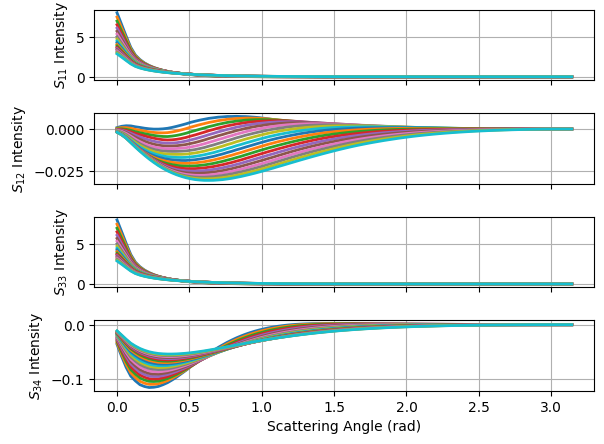

In [11]:
# plot the Mueller matrix elements
plot_mueller_matrix_elems(theta_test, mie_scatt[:, :, 0, 0], mie_scatt[:, :, 0, 1],
                          mie_scatt[:, :, 2, 2], mie_scatt[:, :, 2, 3])

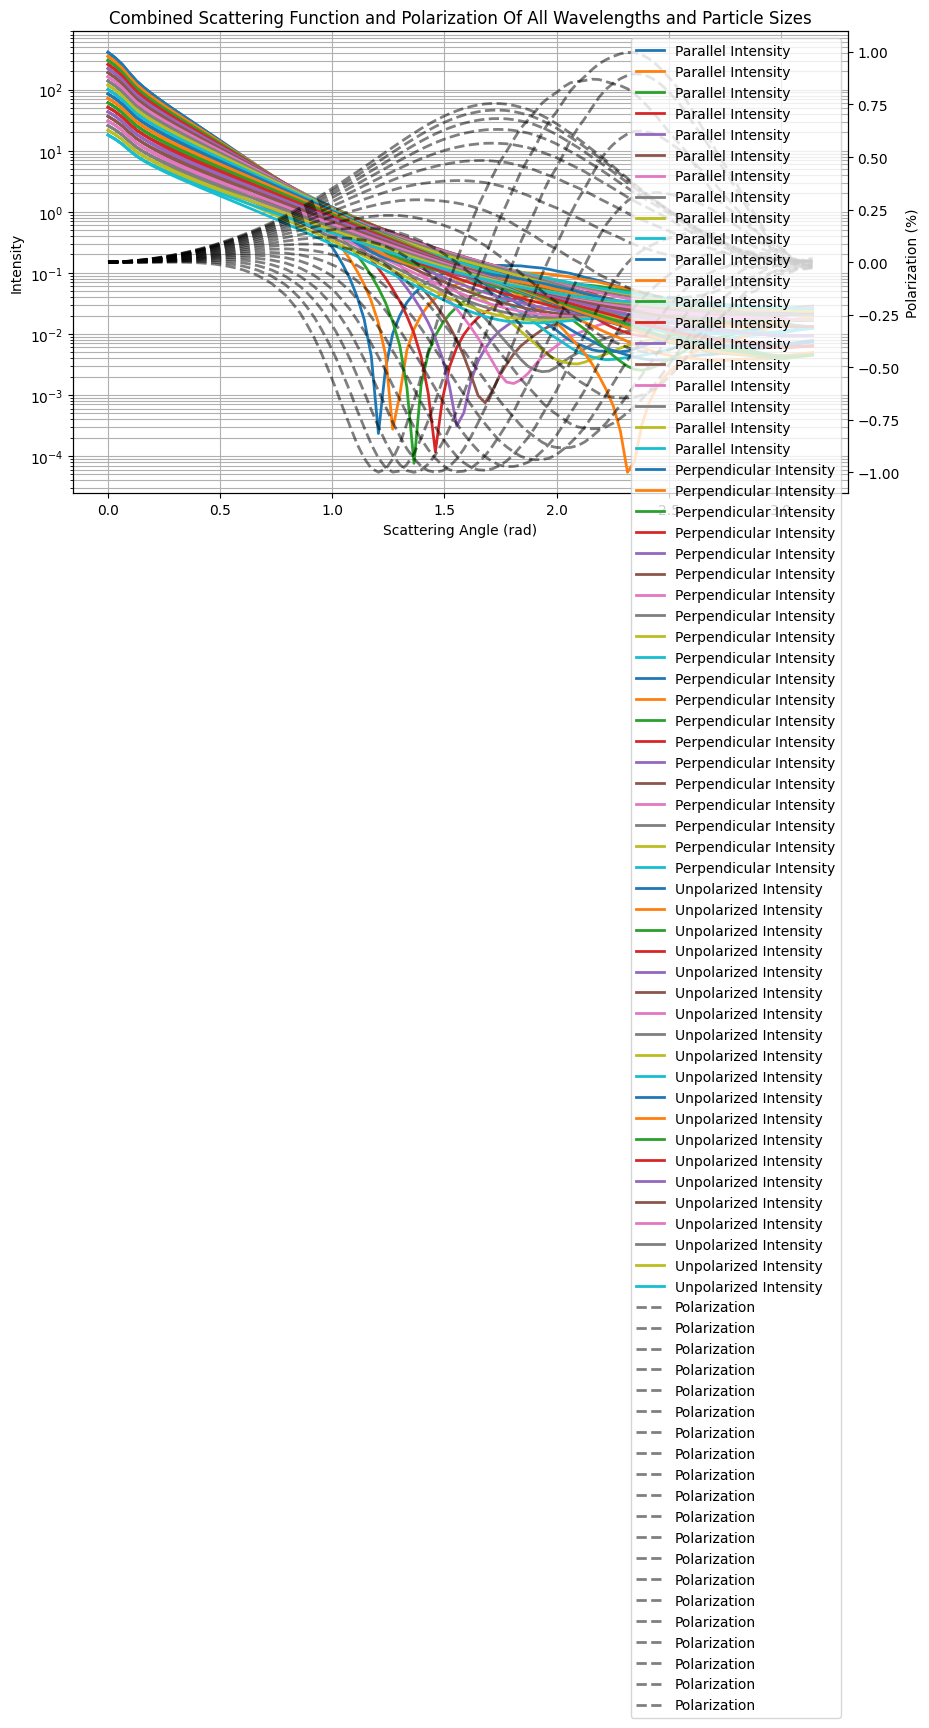

In [6]:
plot_intensity_polarization(theta_test, SL, SR, SU, P)

In [ ]:
mie.save('saved_models/white_light_mie_model')

## Plot Kelsall phase function model

In [5]:
from zodipy._source_funcs import get_phase_function

theta = np.linspace(0, np.pi, 100)
C = (-0.942, 0.121, -0.165)
phase_func = get_phase_function(theta, C)

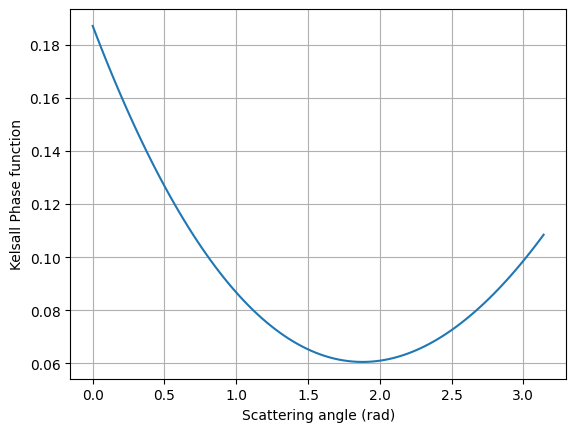

In [8]:
plt.figure()
plt.plot(theta, phase_func)
plt.grid()
plt.xlabel('Scattering angle (rad)')
plt.ylabel('Kelsall Phase function')
plt.show()

In [23]:
# show the normalization of the phase function
2 * np.pi * np.trapz(phase_func * np.sin(theta), theta)

0.9998441668704724

In [16]:
print(2 * np.pi * np.trapz(mie_scatt[:, :, 0, 0], theta_test, axis=0))

[6.92739283 6.65339347 6.39470519 6.14808301 5.91386376 5.69355679
 5.48823899 5.2992727  5.12740484 4.97184653 4.83076023 4.70155879
 4.5818431  4.4698762  4.36450794 4.26539062 4.17241241 4.08516156
 4.00335102 3.92697862]


(100,)